In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diamonds.csv")

# 

    price price in US dollars ($326--$18,823)

    carat weight of the diamond (0.2--5.01)

    cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

    color diamond colour, from J (worst) to D (best)

    clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

    x length in mm (0--10.74)

    y width in mm (0--58.9)

    z depth in mm (0--31.8)

    depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

    table width of top of diamond relative to widest point (43--95)


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [11]:
df.duplicated().sum()

146

In [12]:
df.shape

(53940, 10)

# data cleaning

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.shape

(53794, 10)

In [19]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

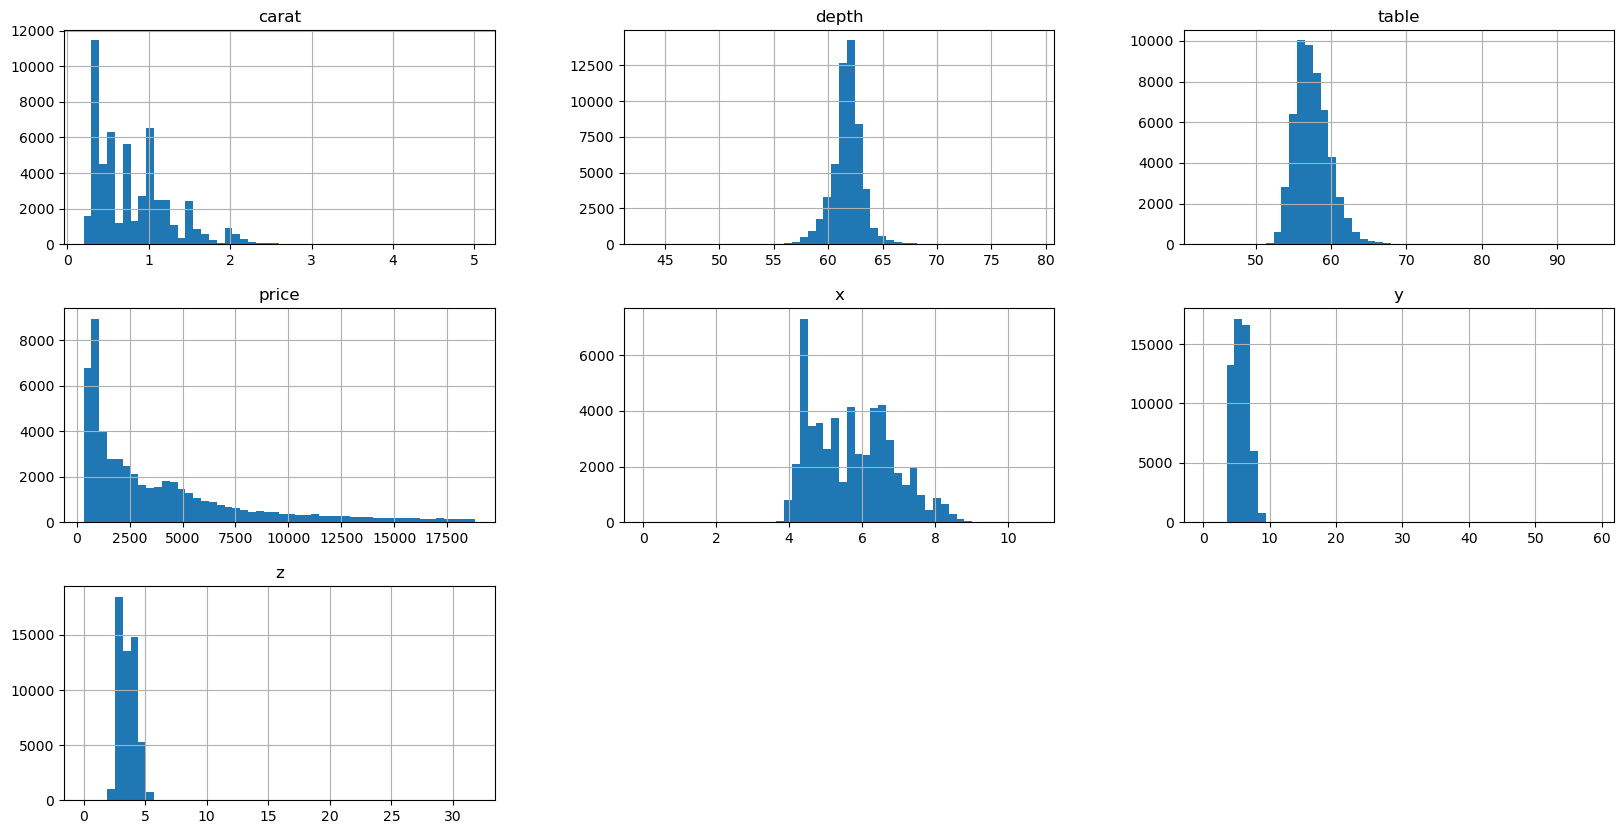

In [36]:
df.hist(figsize=(20,10),bins=50)

<AxesSubplot:xlabel='cut', ylabel='count'>

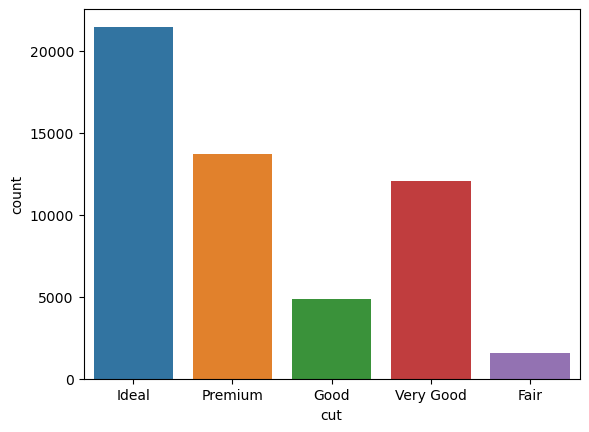

In [23]:
sbn.countplot(x='cut',data=df)

<AxesSubplot:xlabel='color', ylabel='count'>

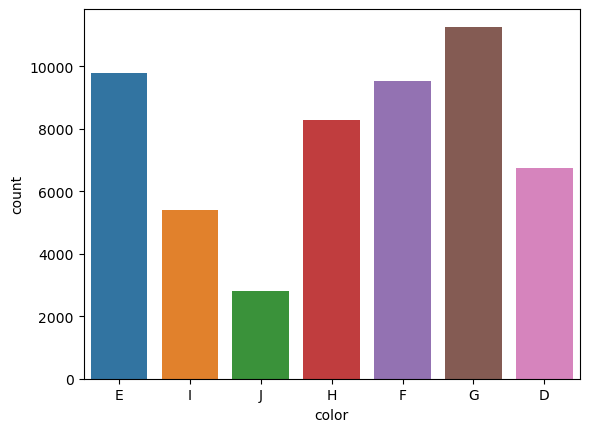

In [27]:
sbn.countplot(x="color",data=df)

# Price 

In [20]:
df.corr()["price"].sort_values()

depth   -0.011048
table    0.126566
z        0.861208
y        0.865395
x        0.884504
carat    0.921548
price    1.000000
Name: price, dtype: float64

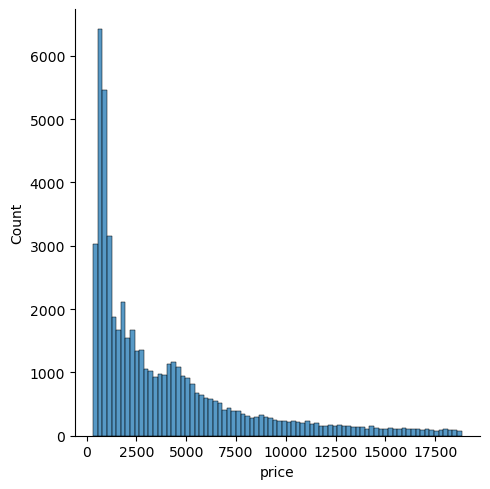

In [21]:
sbn.displot(df["price"])

Text(0, 0.5, 'Frequency')

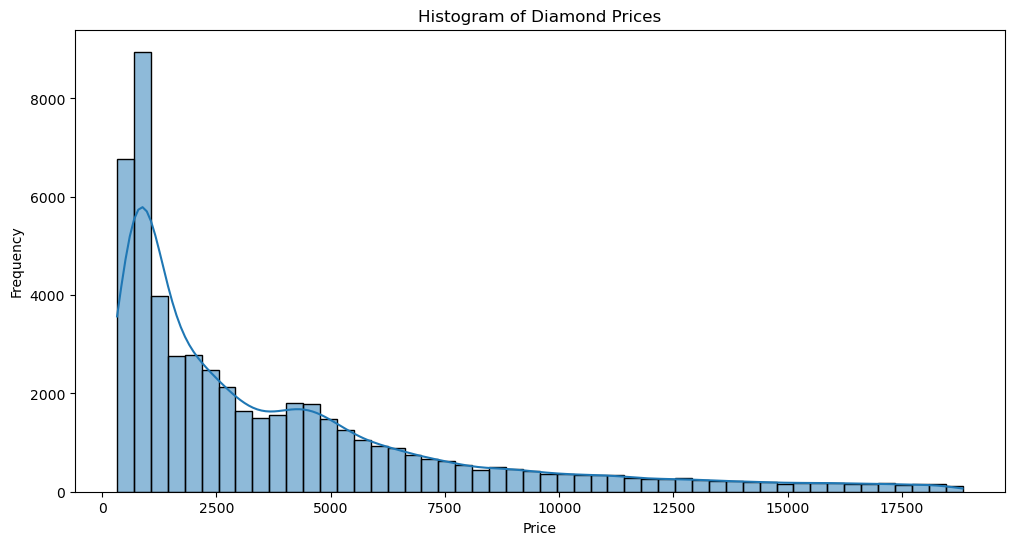

In [33]:
plt.figure(figsize=(12,6))
sbn.histplot(df['price'], bins=50, kde=True,palette="BrBG")
plt.title('Histogram of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='carat', ylabel='price'>

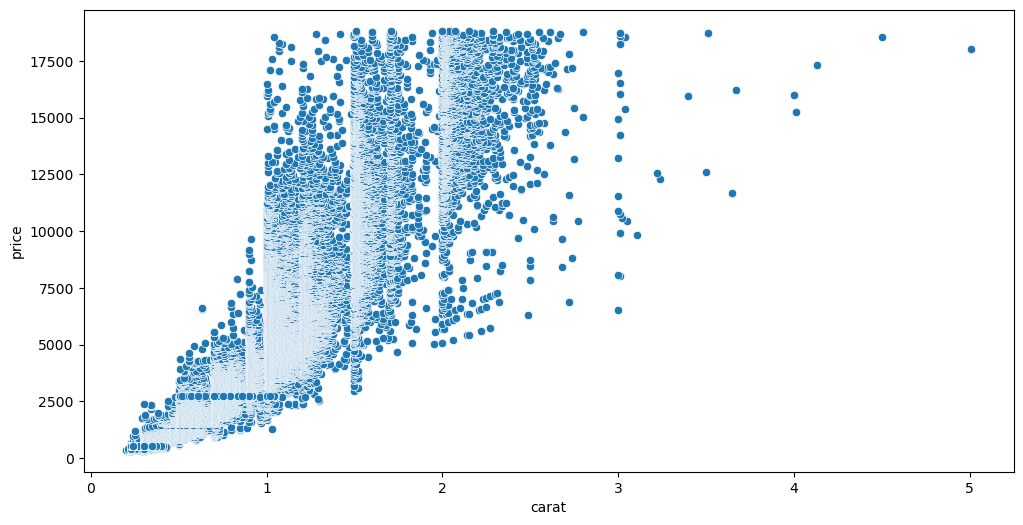

In [34]:
plt.figure(figsize=(12,6))
sbn.scatterplot(x='carat',y='price',data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

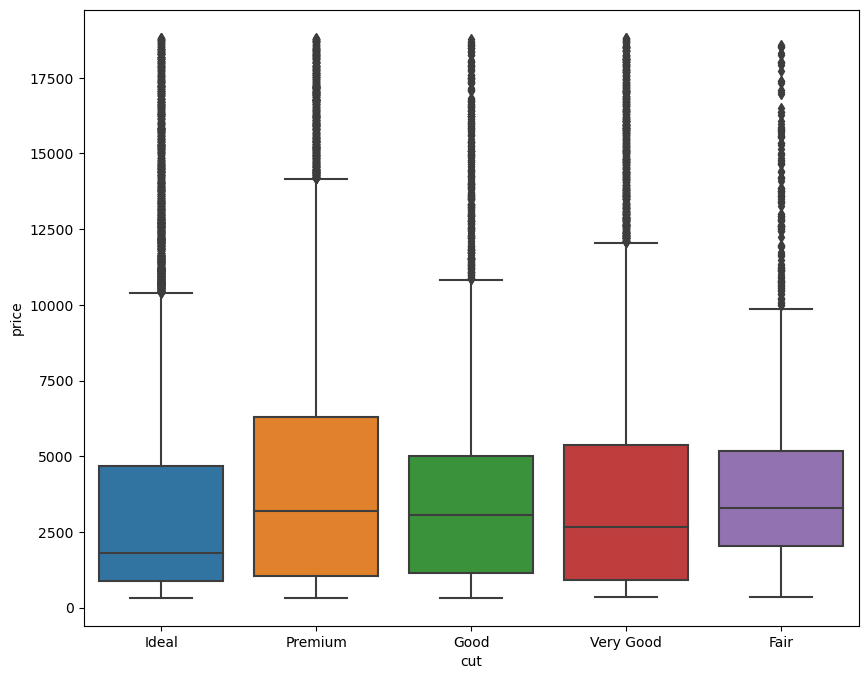

In [28]:
plt.figure(figsize=(10,8))
sbn.boxplot(x='cut',y='price',data=df)

<AxesSubplot:xlabel='clarity', ylabel='Count'>

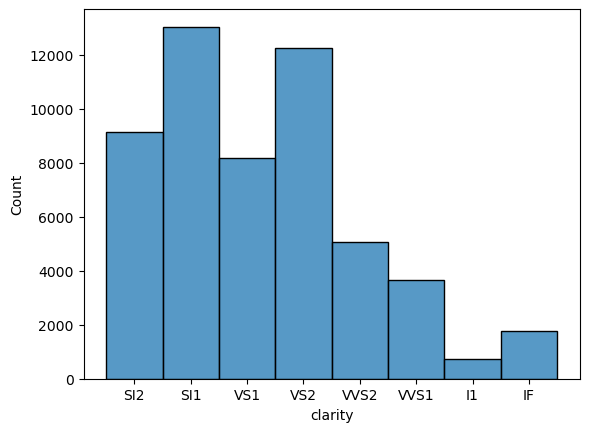

In [35]:
sbn.histplot(df["clarity"])

<AxesSubplot:xlabel='color', ylabel='price'>

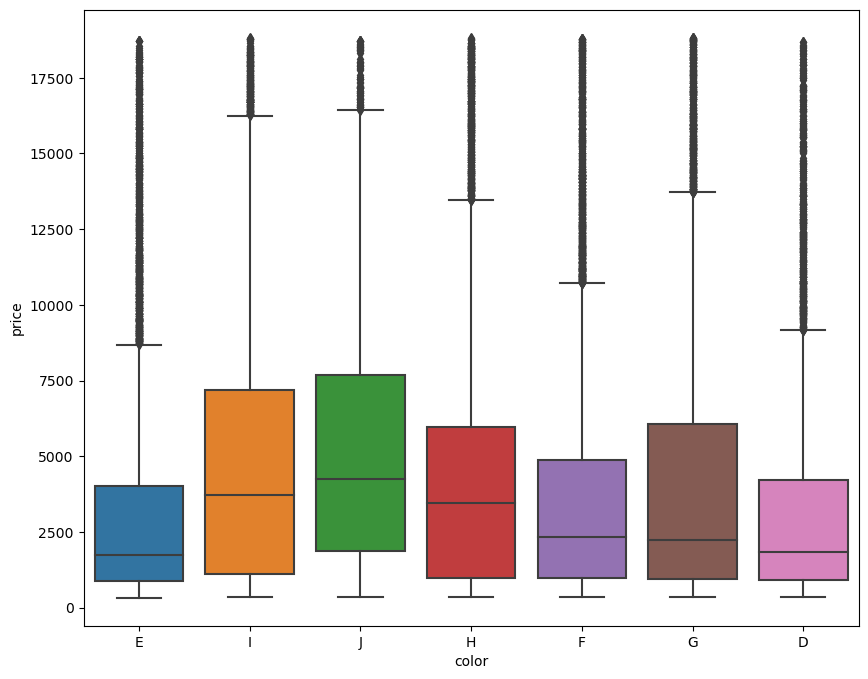

In [31]:
plt.figure(figsize=(10,8))
sbn.boxplot(x='color',y='price',data=df)

In [38]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<AxesSubplot:xlabel='x', ylabel='price'>

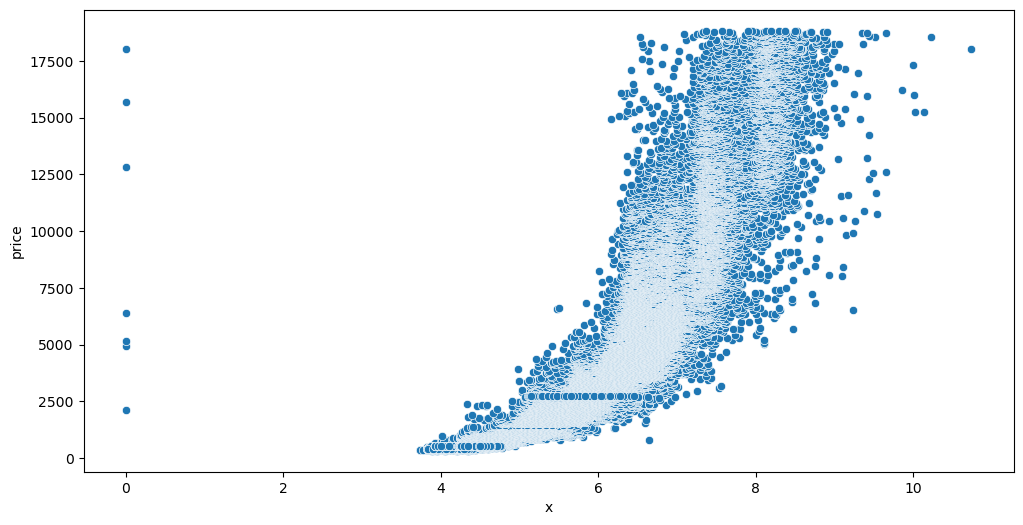

In [39]:
plt.figure(figsize=(12,6))
sbn.scatterplot(x='x',y='price',data=df)